In [1]:
import pandas as pd

errorlogs = pd.read_pickle('errlogs.pkl')
# found thanks to clustering! 
suspicious_cids = [70715, 70716, 74459, 74460, 74461, 74463, 74464]
for cid in suspicious_cids:
    errorlogs = errorlogs[errorlogs.cid != cid]


In [2]:
len(errorlogs)

3531

In [3]:
errorlogs.loc[3]['error_message']

'make[4]: flex: Command not found\nmake[4]: *** [/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_scan.c] Error 127\nmake[3]: *** [drivers/scsi/aic7xxx/aicasm/aicasm] Error 2\nmake[2]: *** [drivers/scsi/aic7xxx] Error 2\nmake[1]: *** [drivers/scsi] Error 2\nmake[1]: *** Waiting for unfinished jobs....\nmake: *** [drivers] Error 2\n'

In [4]:
from enum import Enum, auto
class ErrorLog(Enum):
    BLACKLIGHT = auto(),
    BLACKLIGHT2 = auto(),
    CONFIG_NLS_DEFAULT = auto(),
    CRC32 = auto(),
    V4L2 = auto(), 
    OVERFLOW2 = auto(), 
    ULPI = auto(), 
    PCM = auto(),
    TTM = auto(), 
    AS68K = auto(), 
    GEN = auto(), 
    AICDB = auto(), 
    AIC7XXX = auto(),
    DRM_BRIDGE = auto(),
    PINCTRL = auto(), 
    BTBCM = auto(),
    BPFFANCY = auto(), 
    DEVM = auto(), 
    DEVM2 = auto(), 
    I2C = auto() 
    


    

patterns = { ErrorLog.BLACKLIGHT : "undefined reference to `backlight_device",
            ErrorLog.BLACKLIGHT2: 'error: ‘intel_backlight_device_register’', # 'intel_backlight_device_register', # cid 87044 does not match BACKLIGHT 
            ErrorLog.CONFIG_NLS_DEFAULT : "CONFIG_NLS_DEFAULT",
            ErrorLog.CRC32 : 'undefined reference to `crc32', 
            ErrorLog.V4L2 : 'undefined reference to `v4l2',
            ErrorLog.OVERFLOW2 : '__read_overflow2',
            ErrorLog.ULPI : 'undefined reference to `ulpi', # 100-126K dataset
            ErrorLog.PCM : 'undefined reference to `atmel_pcm_dma_platform', # 100-126K dataset
            ErrorLog.TTM : 'undefined reference to `ttm', 
            ErrorLog.AS68K: 'as68k: not found',
            ErrorLog.GEN : 'undefined reference to `gen_pool', 
            ErrorLog.AIC7XXX: '[drivers/scsi/aic7xxx/aicasm/aicasm] Error 2', #'drivers/scsi/aic7xxx',
            ErrorLog.AICDB : 'aicdb.h: No such file or directory', 
            ErrorLog.DRM_BRIDGE : 'undefined reference to `drm_panel_bridge_add', 
            ErrorLog.PINCTRL : '[drivers/pinctrl/pinctrl-mcp23s08.o] Error', #'pinctrl-mcp23s08', # loosely pattern (too general?)
            ErrorLog.BTBCM : 'undefined reference to `btbcm_set_bdaddr', 
            ErrorLog.BPFFANCY : 'bpf-fancy', # loosely pattern (too general?)
            ErrorLog.DEVM : 'undefined reference to `__devm_regmap',
            ErrorLog.I2C: 'error: implicit declaration of function ‘i2c_get_adapter’', #'i2c_get_adapter',
            ErrorLog.DEVM2 : 'undefined reference to `devm_of_led'
           }

pattern_name = [name for name, member in ErrorLog.__members__.items()]
error_pattern = pd.DataFrame(columns=pattern_name, index=errorlogs['cid'])
error_pattern.fillna(False, inplace=True)

for i, errorlog in errorlogs.iterrows():
    error = errorlog['error_message']
    cid = errorlog['cid']
    for k, p in patterns.items():
        if (p in error):
            error_pattern.loc[cid][k.name] = True
            #print (k.name, "found in configuration", cid)
            
            
            


In [5]:
#error_pattern.loc[99949]['BLACKLIGHT'] = True
error_pattern['CONFIG_NLS_DEFAULT'].value_counts()
#error_pattern.hist()

False    3526
True        5
Name: CONFIG_NLS_DEFAULT, dtype: int64

BLACKLIGHT              10
BLACKLIGHT2              1
CONFIG_NLS_DEFAULT       5
CRC32                    2
V4L2                     9
OVERFLOW2               86
ULPI                     0
PCM                      0
TTM                     11
AS68K                  550
GEN                    279
AICDB                 2514
AIC7XXX               2681
DRM_BRIDGE               3
PINCTRL                  3
BTBCM                    2
BPFFANCY                 2
DEVM                     2
DEVM2                    1
I2C                      1
dtype: int64

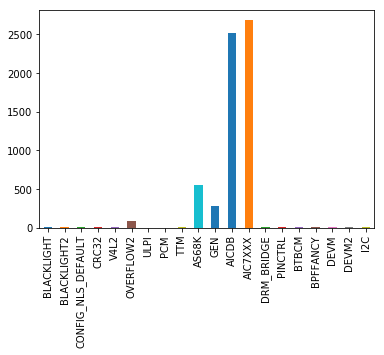

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  

def nb_patterns(row):
    return sum(row == True)                    
error_pattern['nb_patterns'] = error_pattern.apply(nb_patterns, axis=1)
pattern_frequencies = error_pattern[pattern_name].apply(nb_patterns, axis=0)
pattern_frequencies.plot(kind='bar')
pattern_frequencies

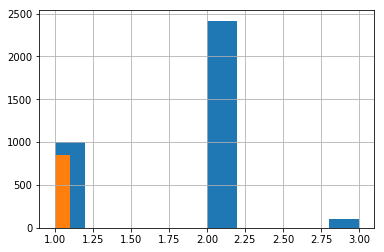

In [7]:
error_pattern['nb_patterns'].hist()
error_pattern.query("AIC7XXX == False")['nb_patterns'].hist()

In [8]:
error_pattern.sort_values(by='nb_patterns', ascending=False)[:20]

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
68566,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
59360,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
57646,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
51532,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
79222,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
46328,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
37984,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
44012,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3
72724,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,3


In [9]:
#error_pattern['CONFIG_NLS_DEFAULT'].value_counts().plot(kind='bar')
error_pattern.query('nb_patterns == 0')

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [10]:
error_pattern.query('nb_patterns == 0').shape

(0, 21)

In [11]:
for cid in error_pattern.query('nb_patterns == 0').index:
    print ("configuration cid", cid)
    #if cid in suspicious_cids:
    #    print("false positive failure")
    #    continue
    
    error_message = errorlogs.query("cid == " + str(cid))['error_message'].values
    for err in error_message[0].splitlines():
        if "Cyclomatic" not in err:
            print (err)
    print()
    print()
    print()
    
# 74459, 74460, 74461, 74463, 74464

In [12]:
error_pattern.query('nb_patterns >= 2 & (AS68K == True & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)



,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [13]:
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AIC7XXX == False & AICDB == True)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [14]:
#error_pattern.query('nb_patterns == 2 & (as68k == False & AIC7XXX == True)').sort_values(by='nb_patterns', ascending=False)
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AICDB == False & AIC7XXX == True)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,


In [15]:
error_pattern.query('nb_patterns >= 2 & (AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
60939,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
78770,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2


In [16]:
# masking effect
error_pattern.query('nb_patterns >= 2 & CONFIG_NLS_DEFAULT == True').sort_values(by='nb_patterns', ascending=False)
error_pattern.query('CONFIG_NLS_DEFAULT == True').sort_values(by='nb_patterns', ascending=False)


,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
44596,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
52277,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
60391,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
62743,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
99949,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [17]:
# masking effect
error_pattern.query('GEN == True').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
78770,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
60939,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
30821,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
79950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
79434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
79281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
78932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
78821,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
78740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [18]:
error_pattern.query('BLACKLIGHT == True').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
59503,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
64086,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
65670,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
66938,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
67750,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
75145,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
81720,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
89618,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
93674,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [19]:
# nice masking effect!
error_pattern.query('PINCTRL == True & (AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
37227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
89854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
98605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [20]:
# nice masking effect!
error_pattern.query('I2C == True & (PINCTRL == False & AS68K == False & AIC7XXX == False)').sort_values(by='nb_patterns', ascending=False)

,BLACKLIGHT,BLACKLIGHT2,CONFIG_NLS_DEFAULT,CRC32,V4L2,OVERFLOW2,ULPI,PCM,TTM,AS68K,...,AICDB,AIC7XXX,DRM_BRIDGE,PINCTRL,BTBCM,BPFFANCY,DEVM,DEVM2,I2C,nb_patterns
cid,,,,,,,,,,,,,,,,,,,,,
96730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1


In [21]:
import json
# see Hugo notebook here!
with open("option_columns.json","r") as f:
    option_columns = json.load(f)


In [22]:
rawtuxdata = pd.read_csv("dataset_after_encoding.csv", dtype={k:"int8" for k in option_columns})
rawtuxdata.info(memory_usage='deep')
rawtuxdata.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69362 entries, 0 to 69361
Columns: 12654 entries, X86_LOCAL_APIC to cid
dtypes: float64(6), int64(37), int8(12611)
memory usage: 857.0 MB


(69362, 12654)

In [23]:
basic_head = ["cid", "time", "date"] # "compile"
compilation_status_column_name = 'compile_success'
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree


TESTING_SIZE= 0.001 #0.99 # 0.001 # 0.9
X_train, X_test, y_train, y_test = train_test_split(
    rawtuxdata
    .drop(columns=["cid"])
    .drop(columns=size_methods)
    .drop(columns=compilation_status_column_name), 
    rawtuxdata[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
clf = tree.DecisionTreeClassifier() #GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score

y_pred = clf.predict(X_test)

acc = accuracy_score (y_test, y_pred)
prec = precision_score (y_test, y_pred)
reca = recall_score (y_test, y_pred)
f1 = f1_score (y_test, y_pred)
balance_acc = balanced_accuracy_score (y_test, y_pred)
print("Accuracy score:", acc)
print("Precision score:", prec)
print("Recall score:", reca)
print("F1 score:", f1)
print("Balance accuracy score:", balance_acc)

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
Balance accuracy score: 1.0


In [26]:
import graphviz 

def printTree(clf, feature_names):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render("TUXML_compilation_failures")
    
printTree(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)

In [27]:
from sklearn.tree import _tree

def tree_to_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, previous_rules):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)])
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)])
        else:
            print(" & ".join(previous_rules) + " ---> " + str(tree_.value[node]))

    recurse(0, [])
    
tree_to_rules(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)

AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO <= 1.5 & MLX5_INFINIBAND <= 0.5 & SENSORS_LM83 <= 1.0 ---> [[0. 1.]]
AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO <= 1.5 & MLX5_INFINIBAND <= 0.5 & SENSORS_LM83 > 1.0 ---> [[1. 0.]]
AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO <= 1.5 & MLX5_INFINIBAND > 0.5 & ISDN_DIVAS_USERIDI <= 0.5 & GPIO_KEMPLD <= 1.5 ---> [[0. 3.]]
AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO <= 1.5 & MLX5_INFINIBAND > 0.5 & ISDN_DIVAS_USERIDI <= 0.5 & GPIO_KEMPLD > 1.5 ---> [[1. 0.]]
AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR <= 0.5 & DRM_VBOXVIDEO

In [28]:
def tree_to_failure_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, previous_rules, acc):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)], acc)
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)], acc)
        else:
            if tree_.value[node][0][0] > tree_.value[node][0][1]:
                #print(" & ".join(previous_rules) + " ---> " + str(tree_.value[node]))
                acc.append(" & ".join(previous_rules))

    acc = []
    recurse(0, [], acc)
    return acc
    
all_paths = tree_to_failure_rules(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns)

In [29]:

    
def find_rule_for_configuration(tree, feature_names, configuration):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, previous_rules, configuration):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #print ("{}if {} <= {}:".format(indent, name, threshold))
            if configuration[name] <= threshold:
                recurse(tree_.children_left[node], previous_rules+[name + " <= " + str(threshold)], configuration)
            #print ("{}else:  # if {} > {}".format(indent, name, threshold))
            else:
                recurse(tree_.children_right[node], previous_rules+[name + " > " + str(threshold)], configuration)
        else:
            #if tree_.value[node][0][0] > tree_.value[node][0][1]:
            print(" & ".join(previous_rules))
    
    recurse(0, [], configuration)
    
def find_rule_for_configuration_id(cid):
    return find_rule_for_configuration(clf, rawtuxdata.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=compilation_status_column_name).columns, rawtuxdata.query("cid == " + str(cid)).iloc[0]) 

find_rule_for_configuration_id(92072)

AIC79XX_BUILD_FIRMWARE <= 0.5 & AIC7XXX_BUILD_FIRMWARE <= 0.5 & WANXL_BUILD_FIRMWARE <= 0.5 & GENERIC_ALLOCATOR > 0.5 & UBSAN_SANITIZE_ALL <= 0.5 & VIDEO_XILINX_TPG > 0.5 & CRC32 > 1.0 & VIDEO_ATOMISP > 0.5 & EDAC_DECODE_MCE > 0.5 & RSI_SDIO > 0.5 & SPEAKUP_SYNTH_BNS <= 0.5 & SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH <= 1.5 & SND_PDAUDIOCF <= 1.5 & TYPEC_WCOVE <= 1.5 & CAN_GS_USB <= 1.5 & SND_ATMEL_SOC > 1.5 & BACKLIGHT_LCD_SUPPORT <= 0.5


In [30]:
rawtuxdata.query("AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1").shape

(3106, 12654)

In [31]:
rawtuxdata.query("(AIC7XXX_BUILD_FIRMWARE == 0 & AIC79XX_BUILD_FIRMWARE == 0) & WANXL_BUILD_FIRMWARE == 1")['compile_success'].unique()

array([0])

In [32]:
rawtuxdata.query("AIC7XXX_BUILD_FIRMWARE == 0 & AIC79XX_BUILD_FIRMWARE == 0 & WANXL_BUILD_FIRMWARE == 0 & compile_success == False").shape

(401, 12654)

In [34]:
'''
basic conclusion: bug GENERIC_ALLOCATOR + DRM_VBOXVIDEO is always masked by firmwares-like failures
'''
generic_allocator_mask_firmwares = rawtuxdata.query("GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2 & (AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  & compile_success == False")
print("generic allocator bug with firmwares' failures", generic_allocator_mask_firmwares.shape)
print()
print()
for cid in generic_allocator_mask_firmwares['cid']:
    print ("###### configuration id", cid)
    err_pattern = error_pattern.query("cid == " + str(cid)).iloc[0]
    for err in ErrorLog:
        if (err_pattern[err.name]):
            print(err)
    error_messages = errorlogs.query("cid == " + str(cid)).iloc[0]['error_message'].splitlines()
    for error in error_messages:
        if "Cyclomatic " not in error:
            print(error)
    print()
    print()




generic allocator bug with firmwares' failures (13, 12654)


###### configuration id 30901
ErrorLog.AIC7XXX
make[4]: flex: Command not found
make[4]: *** [/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_scan.c] Error 127
make[3]: *** [drivers/scsi/aic7xxx/aicasm/aicasm] Error 2
make[2]: *** [drivers/scsi/aic7xxx] Error 2
make[1]: *** [drivers/scsi] Error 2
make[1]: *** Waiting for unfinished jobs....
make: *** [drivers] Error 2


###### configuration id 36364
ErrorLog.AS68K
In file included from ./include/linux/uaccess.h:13:0,
                 from ./include/linux/highmem.h:8,
                 from fs/binfmt_elf.c:28:
fs/binfmt_elf.c: In function 'create_elf_tables':
./arch/x86/include/asm/uaccess_64.h:143:20: warning: array subscript is above array bounds [-Warray-bounds]
    __put_user_asm(4[(u16 *)src], 4 + (u16 __user *)dst,
                    ^
./arch/x86/include/asm/uaccess.h:468:16: note: in definition of macro '__put_user_asm'
        : ltype(x), "m" (__m(addr)), "i" (

drivers/gpu/drm/radeon/radeon_object.c: In function 'radeon_bo_create':
drivers/gpu/drm/radeon/radeon_object.c:242:2: warning: #warning Please enable CONFIG_MTRR and CONFIG_X86_PAT for better performance thanks to write-combining [-Wcpp]
 #warning Please enable CONFIG_MTRR and CONFIG_X86_PAT for better performance \
  ^~~~~~~
aicasm_symbol.c:48:19: fatal error: aicdb.h: No such file or directory
 #include "aicdb.h"
                   ^
compilation terminated.
aicasm_gram.tab.c: In function 'yyparse':
aicasm_gram.tab.c:1628:16: warning: implicit declaration of function 'yylex' [-Wimplicit-function-declaration]
aicasm_macro_gram.tab.c: In function 'mmparse':
/TuxML/linux-4.13.3/drivers/scsi/aic7xxx/aicasm//aicasm_macro_gram.c:64:25: warning: implicit declaration of function 'mmlex' [-Wimplicit-function-declaration]
 #define yylex           mmlex
                         ^
aicasm_macro_gram.tab.c:1199:16: note: in expansion of macro 'yylex'
aicasm_scan.l: In function 'yylex':
aicasm_scan.

In [35]:
'''
basic conclusion: bug GENERIC_ALLOCATOR + DRM_VBOXVIDEO is not masked by other failures
but may mask other failures 
'''

generic_allocator_mask_notfirmware = rawtuxdata.query("GENERIC_ALLOCATOR == 0 & DRM_VBOXVIDEO == 2 & ~(AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  & compile_success == False")


print("generic allocator bug *without* firmwares' failures", generic_allocator_mask_notfirmware.shape)
print()
print()
for cid in generic_allocator_mask_notfirmware['cid']:
    err_pattern = error_pattern.query("cid == " + str(cid)).iloc[0]
    if not (err_pattern[ErrorLog.GEN.name]):
        print ("###### configuration id", cid)
        print("GENERIC allocator NOT found")
    #else:
    #    for err in ErrorLog:
    #        if (err_pattern[err.name]):
    #            print(err)
   

generic allocator bug *without* firmwares' failures (277, 12654)




In [36]:
# ~(AIC7XXX_BUILD_FIRMWARE == 1 | AIC79XX_BUILD_FIRMWARE == 1 | WANXL_BUILD_FIRMWARE == 1)  &
# Mathieu: I'm deactivating it, it's time-consuming and error-prone 
if False:
    for path1 in all_paths[::-1]:
        # collect all cids related to a path
        path_cids = rawtuxdata.query(path1 + " & compile_success == False")['cid'].values
        spath_cids = set(path_cids)
        print (path1)
        for path2 in all_paths[::-1]:
            if (path1 != path2):                
                for cid in path_cids:
                    # report whether an alternate path/rule can match the cid 
                    #print (cid)
                    overlap = rawtuxdata.query(path2 + " & compile_success == False & cid == " + str(cid)) #['cid'].values
                    #overlap = list(spath_cids & set(path_cids2)) 
                    if len(overlap) > 0:
                        print(path1, "also hold with\n", path2, "=> #", overlap)
                        print()
    
       
#    for path2 in all_paths:
#        if (path1 != path2):
#            overlap = len(rawtuxdata.query(path1 + " | ~(" + path2 + ") & compile_success == False").index)
#            if  overlap > 0:
#                print(path1, "also hold with\n", path2, "=> #", overlap)
#                print()
        
        
